In [1]:
# import necessary packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
color = sns.color_palette()
import matplotlib.mlab as mlab
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

## Loading our final datasets

In [2]:
final_state_data = pd.read_csv('final_data_states.csv')
#final_industry_data = pd.read_csv('Data and Preprocessing/Data/industry_allyear.csv')
#final_state_industry_data = pd.read_csv('Data and Preprocessing/Data/Codes.csv')

In [3]:
final_state_data = final_state_data.drop(['Unnamed: 0'], axis=1)

In [6]:
column_description = pd.DataFrame(final_state_data.dtypes)

In [27]:
final_state_data_lag1 = pd.read_csv('state_data_lag1year.csv')
final_state_data_lag2 = pd.read_csv('state_data_lag2years.csv')

_______________

## Start by separating the features with the targets

In [28]:
contract_establish = final_state_data['contract_establish']
end_establish = final_state_data['end_establish']
expand_establish = final_state_data['expand_establish']
net_change = final_state_data['net_change']
open_establish = final_state_data['open_establish']
total_contract = final_state_data['total_contract']
total_expand = final_state_data['total_expand']

In [29]:
contract_establish_lag1 = final_state_data_lag1['contract_establish']
end_establish_lag1 = final_state_data_lag1['end_establish']
expand_establish_lag1 = final_state_data_lag1['expand_establish']
net_change_lag1 = final_state_data_lag1['net_change']
open_establish_lag1 = final_state_data_lag1['open_establish']
total_contract_lag1 = final_state_data_lag1['total_contract']
total_expand_lag1 = final_state_data_lag1['total_expand']

contract_establish_lag2 = final_state_data_lag2['contract_establish']
end_establish_lag2 = final_state_data_lag2['end_establish']
expand_establish_lag2 = final_state_data_lag2['expand_establish']
net_change_lag2 = final_state_data_lag2['net_change']
open_establish_lag2 = final_state_data_lag2['open_establish']
total_contract_lag2 = final_state_data_lag2['total_contract']
total_expand_lag2 = final_state_data_lag2['total_expand']

In [30]:
features_lag1 = final_state_data_lag1.drop(['contract_establish', 'end_establish', 'expand_establish', 'net_change',
                                        'open_establish', 'total_contract', 'total_expand', 'GeoName',
                                 'year', 'state', 'Top Industry'], axis=1)
features_lag2 = final_state_data_lag2.drop(['contract_establish', 'end_establish', 'expand_establish', 'net_change',
                                        'open_establish', 'total_contract', 'total_expand', 'GeoName',
                                 'year', 'state', 'Top Industry'], axis=1)

In [31]:
features = final_state_data.drop(['contract_establish', 'end_establish', 'expand_establish', 'net_change',
                                        'open_establish', 'total_contract', 'total_expand', 'GeoName',
                                 'year', 'state', 'Top Industry'], axis=1)

## Explore how the features are correlated to the target

In [29]:
correlation = final_state_data.select_dtypes(include=[np.number]).corr()

In [30]:
correlation_target = correlation[['contract_establish','end_establish', 'expand_establish', 'net_change', 'open_establish', 
             'total_contract', 'total_expand' ]]

In [11]:
corr_contract_establish = pd.DataFrame(correlation_target['contract_establish'].loc[
    correlation_target['contract_establish'] > 0.95].sort_values(ascending=False))
print(corr_contract_establish)

                                   contract_establish
contract_establish                           1.000000
total_contract                               0.998525
expand_establish                             0.991177
total_expand                                 0.990913
Wage and salary employment                   0.985066
Population (persons)                         0.981079
Total employment                             0.980067
Total employment (number of jobs)            0.980067
open_establish                               0.971668
end_establish                                0.970211
Real GDP by state                            0.964467


In [12]:
corr_end_establish = pd.DataFrame(correlation_target['end_establish'].loc[
    correlation_target['end_establish'] > 0.9].sort_values(ascending=False))
print(corr_end_establish)

                                   end_establish
end_establish                           1.000000
open_establish                          0.993701
total_contract                          0.981933
total_expand                            0.977108
contract_establish                      0.970211
expand_establish                        0.967299
Veterans' life insurance benefits       0.948621
Population (persons)                    0.935398
Wage and salary employment              0.934724
Total employment                        0.927428
Total employment (number of jobs)       0.927428
Monetary interest receipts              0.916698
Real GDP by state                       0.908059
Personal interest income                0.907338


In [31]:
corr_expand_establish = pd.DataFrame(correlation_target['expand_establish'].loc[
    correlation_target['expand_establish'] > 0.93].sort_values(ascending=False))
print(corr_expand_establish)

                                                    expand_establish
expand_establish                                            1.000000
total_expand                                                0.998852
contract_establish                                          0.991177
total_contract                                              0.990981
Wage and salary employment                                  0.985780
Population (persons)                                        0.982500
Total employment                                            0.981720
Total employment (number of jobs)                           0.981720
open_establish                                              0.976339
end_establish                                               0.967299
Real GDP by state                                           0.965467
Receipts from state and local governments                   0.947467
Proprietors employment                                      0.944914
Nonfarm proprietors employment    

In [14]:
corr_open_establish = pd.DataFrame(correlation_target['open_establish'].loc[
    correlation_target['open_establish'] > 0.9].sort_values(ascending=False))
print(corr_open_establish)

                                   open_establish
open_establish                           1.000000
end_establish                            0.993701
total_expand                             0.985577
total_contract                           0.981659
expand_establish                         0.976339
contract_establish                       0.971668
Veterans' life insurance benefits        0.951480
Wage and salary employment               0.944651
Population (persons)                     0.944609
Total employment                         0.938116
Total employment (number of jobs)        0.938116
Monetary interest receipts               0.919784
Real GDP by state                        0.917212
Personal interest income                 0.914346


In [15]:
corr_net_change = pd.DataFrame(correlation_target['net_change'].loc[
    correlation_target['net_change'] > 0.9].sort_values(ascending=False))
print(corr_net_change)

            net_change
net_change         1.0


In [16]:
corr_total_contract = pd.DataFrame(correlation_target['total_contract'].loc[
    correlation_target['total_contract'] > 0.95].sort_values(ascending=False))
print(corr_total_contract)

                                   total_contract
total_contract                           1.000000
contract_establish                       0.998525
total_expand                             0.992973
expand_establish                         0.990981
end_establish                            0.981933
open_establish                           0.981659
Wage and salary employment               0.978907
Population (persons)                     0.975945
Total employment                         0.973368
Total employment (number of jobs)        0.973368
Real GDP by state                        0.956842


In [17]:
corr_total_expand = pd.DataFrame(correlation_target['total_expand'].loc[
    correlation_target['total_expand'] > 0.95].sort_values(ascending=False))
print(corr_total_expand)

                                   total_expand
total_expand                           1.000000
expand_establish                       0.998852
total_contract                         0.992973
contract_establish                     0.990913
open_establish                         0.985577
Wage and salary employment             0.980704
Population (persons)                   0.978128
end_establish                          0.977108
Total employment                       0.976079
Total employment (number of jobs)      0.976079
Real GDP by state                      0.958729


## Correlations of our features

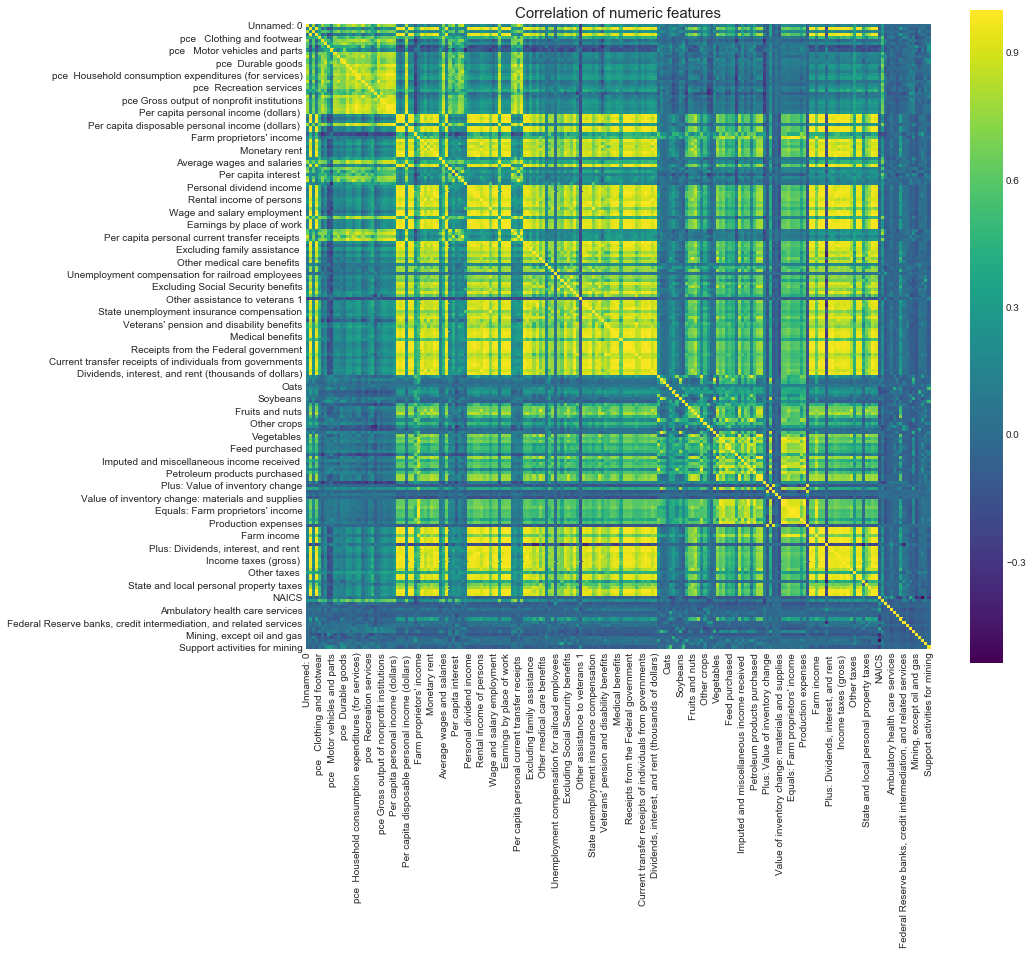

In [18]:
f, ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of numeric features', size = 15)
sns.heatmap(features.corr(), square=True, vmax=1, cmap='viridis')

________

# Running the regressions

## Working with expand establish as target

In [541]:
X = features.drop(['Wage and salary employment', 'Population (persons) ', 'Total employment',
                  'Total employment (number of jobs)', 'Real GDP by state', 
                   'Receipts from state and local governments', 'Proprietors employment', 
                  'Nonfarm proprietors employment'], axis=1)
y = expand_establish

In [542]:
X_lag1 = features_lag1.drop(['Wage and salary employment', 'Population (persons) ', 'Total employment',
                  'Total employment (number of jobs)', 'Real GDP by state', 
                   'Receipts from state and local governments', 'Proprietors employment', 
                  'Nonfarm proprietors employment'], axis=1)
y_lag1 = expand_establish_lag1

In [543]:
X_lag2 = features_lag2.drop(['Wage and salary employment', 'Population (persons) ', 'Total employment',
                  'Total employment (number of jobs)', 'Real GDP by state', 
                   'Receipts from state and local governments', 'Proprietors employment', 
                  'Nonfarm proprietors employment'], axis=1)
y_lag2 = expand_establish_lag2

In [544]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(X))
data_normalized.columns = X.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [545]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized_lag1 = pd.DataFrame(min_max_scaler.fit_transform(X_lag1))
data_normalized_lag1.columns = X_lag1.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [397]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized_lag2 = pd.DataFrame(min_max_scaler.fit_transform(X_lag2))
data_normalized_lag2.columns = X_lag2.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [546]:
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [547]:
# Create correlation matrix
corr_matrix = X_lag1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop_lag1 = [column for column in upper.columns if any(upper[column] > 0.8)]

In [548]:
# Create correlation matrix
corr_matrix = X_lag2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop_lag2 = [column for column in upper.columns if any(upper[column] > 0.8)]

In [549]:
X_new = data_normalized.drop(to_drop, axis=1)
X_new.shape

(1000, 64)

In [550]:
X_new_lag1 = data_normalized_lag1.drop(to_drop_lag1, axis=1)
X_new_lag1.shape

(950, 65)

In [551]:
X_new_lag2 = data_normalized_lag2.drop(to_drop_lag2, axis=1)
X_new_lag2.shape

(900, 68)

In [404]:
# Create and fit selector
selector = SelectKBest(f_regression, k=15)
selector.fit(X_new, y)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [405]:
# Create and fit selector
selector = SelectKBest(f_regression, k=15)
selector.fit(X_new_lag1, y_lag1)
# Get idxs of columns to keep
idxs_selected_lag1 = selector.get_support(indices=True)
kbest_scores_lag1 = pd.DataFrame(selector.scores_)
kbest_scores_lag1.columns = ['kbest_score']

In [406]:
# Create and fit selector
selector = SelectKBest(f_regression, k=15)
selector.fit(X_new_lag2, y_lag2)
# Get idxs of columns to keep
idxs_selected_lag2 = selector.get_support(indices=True)
kbest_scores_lag2 = pd.DataFrame(selector.scores_)
kbest_scores_lag2.columns = ['kbest_score']

In [407]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest = X_new.iloc[:,idxs_selected]
X_kbest = sm.add_constant(X_new)

In [408]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest_lag1 = X_new_lag1.iloc[:,idxs_selected_lag1]
X_kbest_lag1 = sm.add_constant(X_kbest_lag1)

In [409]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest_lag2 = X_new_lag2.iloc[:,idxs_selected_lag2]
X_kbest_lag2 = sm.add_constant(X_kbest_lag2)

In [410]:
# creating a train/test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=42)

In [411]:
X_train_lag1 = X_kbest_lag1.iloc[:-50,:]
X_test_lag1 =X_kbest_lag1.iloc[-50:,:]
y_train_lag1 = y_lag1[:-50]
y_test_lag1 = y_lag1[-50:]

In [412]:
model = sm.OLS(y_train_lag1, X_train_lag1).fit()
predictions = model.predict(X_test_lag1) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       expand_establish   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     694.4
Date:                Mon, 26 Nov 2018   Prob (F-statistic):               0.00
Time:                        16:45:23   Log-Likelihood:                -12627.
No. Observations:                 900   AIC:                         2.529e+04
Df Residuals:                     884   BIC:                         2.536e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                      3.171e+05   3.21e+04      9.874      0.000    2.54e+05     3.8e+05
Gross domestic product (GDP) by state                      8.612e+06   2.64e+05     32.644      0.000    8.09e+06    9.13e+06
pce   Clothing and footwear                               -5.415e+05   9.77e+04     -5.541      0.000   -7.33e+05    -3.5e+05
Farm proprietors employment                                4.303e+05   1.09e+05      3.943      0.000    2.16e+05    6.45e+05
Farm proprietors' income                                  -7.409e+05    1.5e+05     -4.923      0.000   -1.04e+06   -4.46e+05
Unemployment insurance compensation                       -7.335e+05   2.28e+05     -3.221      0.001   -1.18e+06   -2.86e+05
Railroad retirement and disability benefits                4.575e+05   1.02e+05      4.481      0.000    2.57e+05    6.58e+05
Workers' compensation                                       5.26e+05   1.31e+05      4.020      0.000    2.69e+05    7.83e+05
Other transfer receipts of individuals from governments 1 -1.722e+06   1.44e+05    -11.994      0.000      -2e+06   -1.44e+06
Cotton                                                    -1.473e+05   1.61e+05     -0.917      0.359   -4.63e+05    1.68e+05
Dairy products                                             3.197e+05   1.54e+05      2.076      0.038    1.75e+04    6.22e+05
Hay, silage, etc.                                          -9.07e+05   1.72e+05     -5.269      0.000   -1.24e+06   -5.69e+05
Other crops                                                2.836e+05   8.71e+04      3.257      0.001    1.13e+05    4.54e+05
Other taxes                                               -5.982e+05      1e+05     -5.971      0.000   -7.95e+05   -4.02e+05
Local governments                                         -7.918e+05   1.33e+05     -5.952      0.000   -1.05e+06   -5.31e+05
Computer and electronic products manufacturing             3.828e+05   7.06e+04      5.422      0.000    2.44e+05    5.21e+05
==============================================================================
Omnibus:                      538.428   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16433.113
Skew:                           2.177   Prob(JB):                         0.00
Kurtosis:                      23.476   Cond. No.                         35.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [413]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_lag1, y_train_lag1)
reg.score(X_test_lag1, y_test_lag1)

0.8942758251009808

In [414]:
X_train_lag2 = X_kbest_lag2.iloc[:-50,:]
X_test_lag2 = X_kbest_lag2.iloc[-50:,:]
y_train_lag2 = y_lag2[:-50]
y_test_lag2 = y_lag2[-50:]

In [415]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_lag2, y_train_lag2)
reg.score(X_test_lag2, y_test_lag2)

0.903082616641608

In [278]:
model = sm.OLS(y_lag2, X_kbest_lag2).fit()
predictions = model.predict(X_kbest_lag2) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       expand_establish   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     703.3
Date:                Mon, 26 Nov 2018   Prob (F-statistic):               0.00
Time:                        15:45:10   Log-Likelihood:                -12617.
No. Observations:                 900   AIC:                         2.527e+04
Df Residuals:                     884   BIC:                         2.534e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                      3.389e+05    3.2e+04     10.595      0.000    2.76e+05    4.02e+05
Gross domestic product (GDP) by state                      8.095e+06   2.35e+05     34.411      0.000    7.63e+06    8.56e+06
pce   Clothing and footwear                               -5.783e+05   9.49e+04     -6.092      0.000   -7.65e+05   -3.92e+05
Farm proprietors employment                                 2.46e+05   1.11e+05      2.222      0.027    2.87e+04    4.63e+05
Farm proprietors' income                                  -9.728e+05   1.51e+05     -6.450      0.000   -1.27e+06   -6.77e+05
Railroad retirement and disability benefits                6.053e+05   1.01e+05      6.017      0.000    4.08e+05    8.03e+05
Workers' compensation                                      4.535e+05    1.3e+05      3.501      0.000    1.99e+05    7.08e+05
Military medical insurance benefits                       -7.679e+05   1.01e+05     -7.571      0.000   -9.67e+05   -5.69e+05
Other transfer receipts of individuals from governments 1  -1.26e+06    1.3e+05     -9.669      0.000   -1.52e+06      -1e+06
Cotton                                                     3.728e+05   1.63e+05      2.286      0.022    5.27e+04    6.93e+05
Dairy products                                             9.841e+04   1.54e+05      0.638      0.524   -2.04e+05    4.01e+05
Hay, silage, etc.                                         -6.039e+05   1.72e+05     -3.513      0.000   -9.41e+05   -2.66e+05
Other crops                                                4.881e+05   8.77e+04      5.564      0.000    3.16e+05     6.6e+05
Other taxes                                               -5.683e+05   9.78e+04     -5.810      0.000    -7.6e+05   -3.76e+05
Local governments                                         -8.797e+05   1.28e+05     -6.871      0.000   -1.13e+06   -6.28e+05
Computer and electronic products manufacturing             2.367e+05   7.08e+04      3.344      0.001    9.78e+04    3.76e+05
==============================================================================
Omnibus:                      468.854   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13922.738
Skew:                           1.780   Prob(JB):                         0.00
Kurtosis:                      21.937   Cond. No.                         32.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

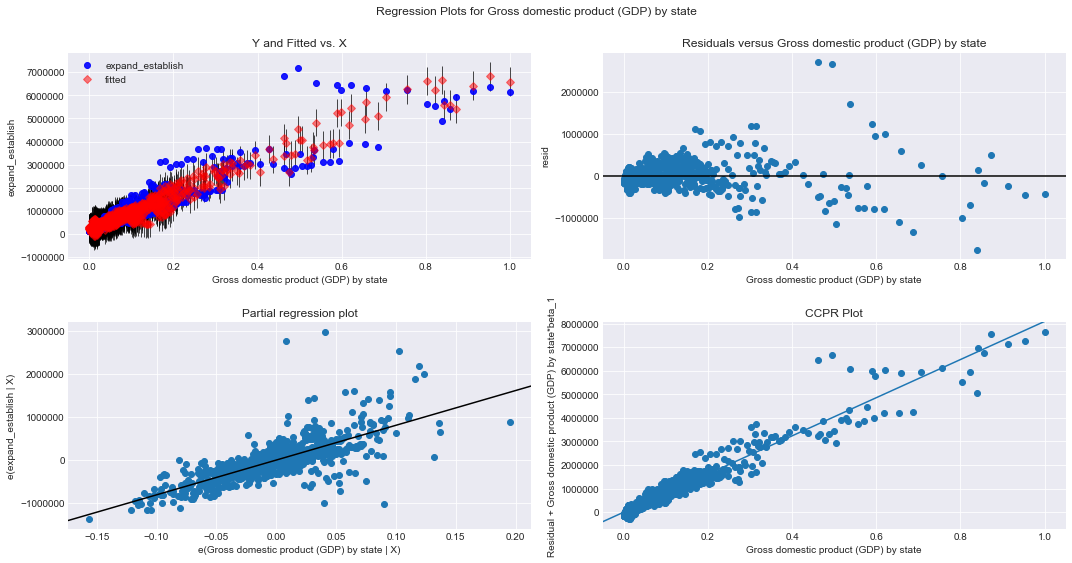

In [279]:
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(model, "Gross domestic product (GDP) by state", fig=fig)

## Applying log transormation onto our variables to show percentage changes

In [255]:
logged_data = np.log(X[['Gross domestic product (GDP) by state', 'Other taxes', 'Local governments', 
                        "Workers' compensation", 'Farm proprietors employment ', 'Per capita rent '
                       ]])
logged_data.columns = ['LOG Gross domestic product (GDP)', 'LOG Taxes', 'LOG Local Government Expenditure',
                      "LOG Average Employee Compensation", 'LOG Farm Employment',
                      'LOG Per Capita Rent']

In [256]:
X_logged = pd.concat([X_kbest, logged_data], axis=1, sort=False)

In [257]:
model = sm.OLS(y, X_logged).fit()
predictions = model.predict(X_logged) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       expand_establish   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     710.1
Date:                Wed, 21 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:20:28   Log-Likelihood:                -13813.
No. Observations:                1000   AIC:                         2.768e+04
Df Residuals:                     973   BIC:                         2.781e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                      -1.01e+06    2.5e+05     -4.035      0.000    -1.5e+06   -5.19e+05
Gross domestic product (GDP) by state                      7.219e+06   2.47e+05     29.218      0.000    6.73e+06     7.7e+06
pce   Clothing and footwear                               -4.282e+05   9.67e+04     -4.427      0.000   -6.18e+05   -2.38e+05
Farm proprietors employment                                 5.76e+05    1.3e+05      4.445      0.000    3.22e+05     8.3e+05
Farm proprietors' income                                  -1.332e+06   2.03e+05     -6.550      0.000   -1.73e+06   -9.33e+05
Unemployment insurance compensation                       -1.637e+06    1.7e+05     -9.647      0.000   -1.97e+06    -1.3e+06
Railroad retirement and disability benefits                  5.9e+05   9.31e+04      6.337      0.000    4.07e+05    7.73e+05
Workers' compensation                                      3.204e+05   1.27e+05      2.524      0.012    7.13e+04    5.69e+05
Military medical insurance benefits                       -1.042e+06   9.34e+04    -11.162      0.000   -1.23e+06   -8.59e+05
Other transfer receipts of individuals from governments 1 -8.282e+05   1.15e+05     -7.233      0.000   -1.05e+06   -6.04e+05
Cotton                                                     4.382e+05   1.38e+05      3.184      0.001    1.68e+05    7.08e+05
Dairy products                                             2.155e+05   1.25e+05      1.727      0.084   -2.94e+04     4.6e+05
Hay, silage, etc.                                         -5.741e+05   1.49e+05     -3.855      0.000   -8.66e+05   -2.82e+05
Other crops                                                5.058e+05   7.12e+04      7.100      0.000    3.66e+05    6.46e+05
All other production expenses                             -2.104e+05   1.76e+05     -1.195      0.232   -5.56e+05    1.35e+05
Imputed and miscellaneous income received                 -7.444e+05   1.68e+05     -4.439      0.000   -1.07e+06   -4.15e+05
Less: Net income of corporate farms                        1.794e+06   1.91e+05      9.400      0.000    1.42e+06    2.17e+06
Other taxes                                               -5.224e+05   7.62e+04     -6.856      0.000   -6.72e+05   -3.73e+05
Local governments                                         -5.837e+05   1.51e+05     -3.871      0.000    -8.8e+05   -2.88e+05
State and local personal property taxes                    1.514e+06   1.42e+05     10.657      0.000    1.24e+06    1.79e+06
Computer and electronic products manufacturing             2.056e+05   5.55e+04      3.703      0.000    9.66e+04    3.14e+05
LOG Gross domestic product (GDP)                           

In [260]:
# Here's the total effect of a 1% parameter change on the target
coefficients = pd.DataFrame(model.params/100, columns=['Expand Establish Effect (1% change in feature)'])
log_coefficients = coefficients.iloc[-6:,:]

In [335]:
log_coefficients.to_csv('expand_establish_perc_effect.csv')

### Using Decision Tree Regressor

In [480]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
treeReg = DecisionTreeRegressor(random_state=0, max_depth=5)
modelRegTree = treeReg.fit(X_train, y_train)
print('Train Score:', treeReg.score(X_train, y_train))
print('Test Score:', treeReg.score(X_test, y_test))

Train Score: 0.9828711191671478
Test Score: 0.9651607208021183


In [305]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
treeReg = DecisionTreeRegressor(random_state=0, max_depth=5)
modelRegTree = treeReg.fit(X_train_lag1, y_train_lag1)
print('Train Score:', treeReg.score(X_train_lag1, y_train_lag1))
print('Test Score:', treeReg.score(X_test_lag1, y_test_lag1))

Train Score: 0.9811843930288222
Test Score: 0.9629364904071986


In [306]:
features_list = X_kbest_lag1.columns
feature_importances = pd.DataFrame({'Feature': features_list, 'importance': 
                                    treeReg.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(5)

,Feature,importance
1,Gross domestic product (GDP) by state,0.789591
10,Dairy products,0.136097
6,Railroad retirement and disability benefits,0.045609
13,Other taxes,0.012355
8,Other transfer receipts of individuals from go...,0.006652


In [304]:
treeReg = DecisionTreeRegressor(random_state=0, max_depth=5)
modelRegTree = treeReg.fit(X_train_lag2, y_train_lag2)
print('Train Score:', treeReg.score(X_train_lag2, y_train_lag2))
print('Test Score:', treeReg.score(X_test_lag2, y_test_lag2))

Train Score: 0.9835505193940636
Test Score: 0.7861617300621903


In [488]:
features_list = X_kbest.columns
feature_importances = pd.DataFrame({'Feature': features_list, 'importance': 
                                    treeReg.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(5)

,Feature,importance
1,Gross domestic product (GDP) by state,0.740786
20,Computer and electronic products manufacturing,0.162026
8,Railroad retirement and disability benefits,0.046449
5,Farm proprietors employment,0.012640
12,Sheep and other livestock,0.012576


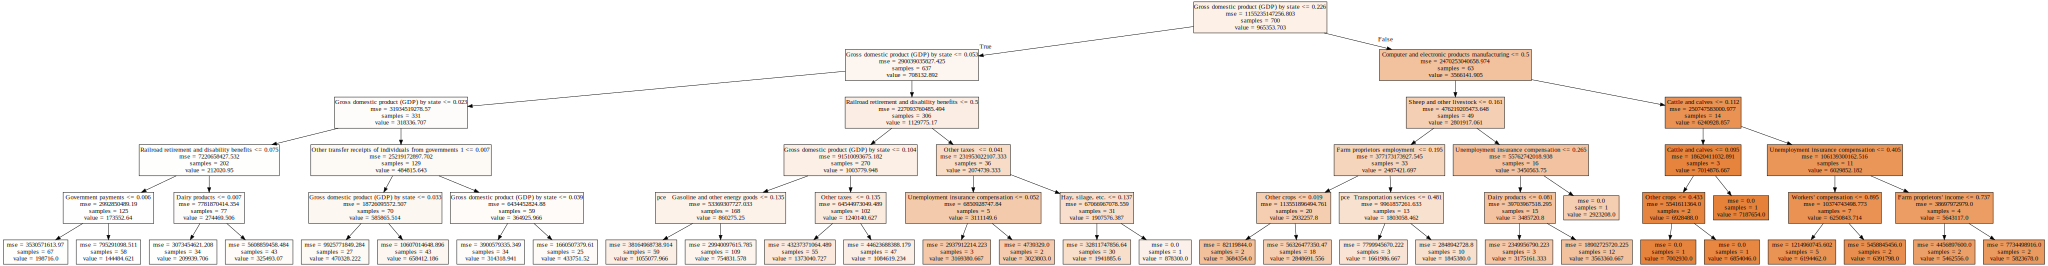

In [512]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(tree.export_graphviz(treeReg, out_file=None
   , feature_names=X_kbest.columns
   , filled = True))
display(SVG(graph.pipe(format='svg')))

## Using XGBoost Regressor

In [416]:
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
import shap
shap.initjs()

In [513]:
xgb = XGBRegressor()
regressor = xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.9857405719300876

In [315]:
xgb_lag1 = XGBRegressor()
regressor = xgb_lag1.fit(X_train_lag1, y_train_lag1)
predictions = xgb_lag1.predict(X_test_lag1)
xgb_lag1.score(X_test_lag1, y_test_lag1)

0.9719145001862489

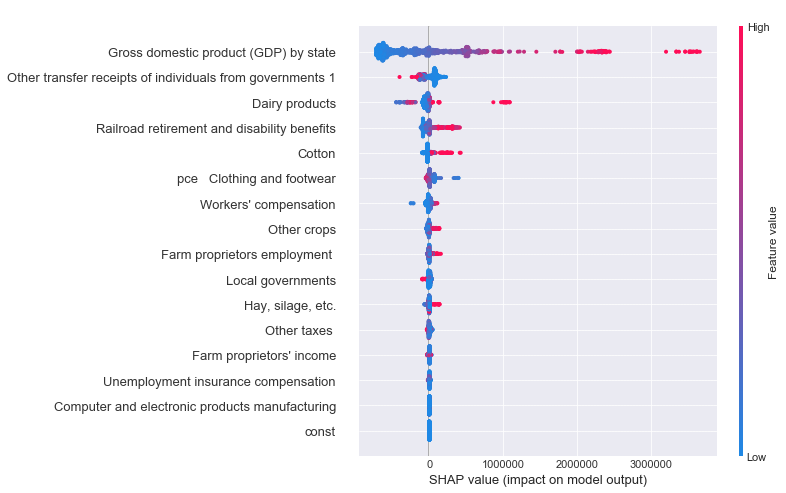

In [316]:
import shap
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_train_lag1)
shap.summary_plot(shap_values, X_train_lag1)

In [417]:
xgb_lag2 = XGBRegressor()
regressor = xgb_lag2.fit(X_train_lag2, y_train_lag2)
predictions = xgb_lag2.predict(X_test_lag2)
xgb_lag2.score(X_test_lag2, y_test_lag2)

0.8892410586314309

In [552]:
X_lag2_predict = data_normalized.iloc[-50:,:].drop(to_drop_lag2, axis=1).iloc[:,idxs_selected_lag2]

In [553]:
regressor = xgb_lag2.fit(X_lag2.drop(['Unnamed: 0'], axis=1), y_lag2)
predictions = xgb_lag2.predict(X_lag2_predict)

ValueError: feature_names mismatch: ['Gross domestic product (GDP) by state', 'Quantity indexes for real GDP by state', 'pce   Clothing and footwear', 'pce   Food and beverages purchased for off-premises consumption', 'pce   Furnishings and durable household equipment', 'pce   Gasoline and other energy goods', 'pce   Motor vehicles and parts', 'pce   Other durable goods', 'pce   Other nondurable goods', 'pce   Recreational goods and vehicles', 'pce  Durable goods', 'pce  Financial services and insurance', 'pce  Food services and accommodations', 'pce  Health care', 'pce  Household consumption expenditures (for services)', 'pce  Housing and utilities', 'pce  Nondurable goods', 'pce  Other services', 'pce  Recreation services', 'pce  Transportation services', 'pce Final consumption expenditures of nonprofit institutions serving households (NPISHs)', 'pce Goods', 'pce Gross output of nonprofit institutions', 'pce Less: Receipts from sales of goods and services by nonprofit institutions', 'pce Services', 'pcePersonal consumption expenditures', 'Per capita personal income (dollars) ', 'Personal income (thousands of dollars)', 'Disposable personal income (thousands of dollars)', 'Per capita disposable personal income (dollars) ', 'Employer contributions for employee pension and insurance funds ', 'Employer contributions for government social insurance', 'Farm proprietors employment ', "Farm proprietors' income", 'Imputed interest receipts ', 'Imputed rent', 'Monetary interest receipts', 'Monetary rent', "Nonfarm proprietors' income", "Average nonfarm proprietors' income", 'Average wages and salaries', 'Income maintenance benefits ', 'Per capita dividends ', 'Per capita income maintenance benefits ', 'Per capita interest ', 'Per capita rent ', 'Per capita retirement and other ', 'Per capita unemployment insurance compensation ', 'Personal dividend income', 'Personal interest income', "Proprietors' income", 'Rental income of persons', 'Retirement and other', 'Supplements to wages and salaries', 'Unemployment insurance compensation', 'Wages and salaries', 'Average earnings per job (dollars)', 'Dividends, interest, and rent', 'Earnings by place of work', 'Net earnings by place of residence', 'Per capita dividends, interest, and rent ', 'Per capita net earnings ', 'Per capita personal current transfer receipts ', 'Per capita personal income ', 'Personal current transfer receipts', 'Excluding family assistance ', 'Family assistance ', 'Medicaid ', 'Other government retirement and disability insurance benefits ', 'Other medical care benefits ', 'Other unemployment compensation ', 'Railroad retirement and disability benefits', 'Unemployment compensation for Federal civilian employees (UCFE)', 'Unemployment compensation for railroad employees', 'Unemployment compensation for veterans (UCX)', "Workers' compensation", 'Earned Income Tax Credit (EITC)', 'Excluding Social Security benefits', 'Excluding state unemployment insurance compensation', 'Medicare benefits', 'Military medical insurance benefits ', 'Other assistance to veterans 1', 'Other income maintenance benefits', 'Public assistance medical care benefits ', 'Social Security benefits', 'State unemployment insurance compensation', 'Supplemental Nutrition Assistance Program (SNAP)', 'Supplemental security income (SSI) benefits', "Veterans' life insurance benefits", "Veterans' pension and disability benefits", "Veterans' readjustment benefits ", 'Education and training assistance 1', 'Income maintenance benefits', 'Medical benefits', 'Other transfer receipts of individuals from governments 1', 'Receipts from businesses', 'Receipts from the Federal government', 'Retirement and disability insurance benefits', "Veterans' benefits", 'Current transfer receipts of individuals from businesses 1', 'Current transfer receipts of individuals from governments', 'Current transfer receipts of nonprofit institutions', 'Personal current transfer receipts (thousands of dollars)', 'Rental income of persons ', 'Dividends, interest, and rent (thousands of dollars)', 'Cattle and calves', 'Corn', 'Hogs and pigs', 'Oats', 'Other grains', 'Sheep and other livestock', 'Sorghum', 'Soybeans', 'Wheat', 'Cotton', 'Dairy products', 'Fruits and nuts', 'Greenhouse, nursery and mushroom products', 'Hay, silage, etc.', 'Meat animals and other livestock', 'Other crops', 'Poultry and poultry products', 'Tobacco', 'Total grains', 'Vegetables', 'All other production expenses ', 'Cash receipts: Crops', 'Cash receipts: Livestock and products', 'Feed purchased', 'Fertilizer and lime (incl. ag. chemicals 1978-fwd.)', 'Government payments', 'Hired farm labor expenses ', 'Imputed and miscellaneous income received ', 'Less: Net income of corporate farms', 'Less: Production expenses', 'Livestock purchased', 'Petroleum products purchased', 'Plus: Farm supplements to wages and salaries', 'Plus: Farm wages and salaries', 'Plus: Statistical adjustment', 'Plus: Value of inventory change', 'Seed purchased', 'Value of inventory change: crops', 'Value of inventory change: livestock', 'Value of inventory change: materials and supplies', 'Cash receipts and other income', 'Cash receipts from marketings (thousands of dollars)', 'Equals: Farm earnings', "Equals: Farm proprietors' income", 'Equals: Net income including corporate farms', 'Equals: Realized net income', 'Other income', 'Production expenses', 'Value of inventory change', 'Employee and self-employed contributions for government social insurance', 'Equals: Net earnings by place of residence', 'Farm income ', 'Less: Contributions for government social insurance ', 'Nonfarm personal income ', 'Plus: Adjustment for residence ', 'Plus: Dividends, interest, and rent ', 'Plus: Personal current transfer receipts', "Proprietors' income ", 'Income taxes (gross) ', 'Less: Refunds', 'Income taxes (net of refunds) ', 'Other taxes', 'Other taxes ', 'Federal government ', 'Less: Personal current taxes', 'Local governments', 'State and local personal property taxes', 'State governments', 'Equals: Disposable personal income', 'Personal current taxes', 'NAICS', 'GDP PC', 'Accommodation', 'Administrative and support services', 'Ambulatory health care services', 'Broadcasting and telecommunications', 'Chemical products manufacturing', 'Computer and electronic products manufacturing', 'Federal Reserve banks, credit intermediation, and related services', 'Food and beverage and tobacco products manufacturing', 'Hospitals and nursing and residential care facilities', 'Insurance carriers and related activities', 'Mining, except oil and gas', 'Motor vehicles, bodies and trailers, and parts manufacturing', 'Oil and gas extraction', 'Publishing industries, except Internet (includes software)', 'Support activities for mining'] ['Quantity indexes for real GDP by state', 'pce   Food and beverages purchased for off-premises consumption', 'pce   Motor vehicles and parts', 'pce Final consumption expenditures of nonprofit institutions serving households (NPISHs)', "Farm proprietors' income", "Average nonfarm proprietors' income", 'Unemployment compensation for railroad employees', 'Military medical insurance benefits ', 'Other assistance to veterans 1', 'Cattle and calves', 'Corn', 'Sorghum', 'Dairy products', 'Hay, silage, etc.', 'Other crops', 'Poultry and poultry products', 'Plus: Statistical adjustment', 'Local governments', 'NAICS', 'Federal Reserve banks, credit intermediation, and related services']
expected Farm income , pce Goods, pce  Recreation services, Equals: Farm earnings, Less: Refunds, Mining, except oil and gas, Hired farm labor expenses , pce Less: Receipts from sales of goods and services by nonprofit institutions, Motor vehicles, bodies and trailers, and parts manufacturing, Veterans' readjustment benefits , Computer and electronic products manufacturing, pce   Gasoline and other energy goods, pce   Other nondurable goods, Average earnings per job (dollars), Medicare benefits, Value of inventory change: livestock, Value of inventory change: materials and supplies, Current transfer receipts of individuals from businesses 1, Receipts from businesses, Cash receipts from marketings (thousands of dollars), Accommodation, Retirement and other, Seed purchased, pce  Health care, Public assistance medical care benefits , State unemployment insurance compensation, Livestock purchased, All other production expenses , Employer contributions for government social insurance, Government payments, Support activities for mining, pce  Transportation services, Oats, Earnings by place of work, Plus: Dividends, interest, and rent , Imputed interest receipts , Plus: Adjustment for residence , Veterans' life insurance benefits, Social Security benefits, Employee and self-employed contributions for government social insurance, Railroad retirement and disability benefits, pce  Durable goods, pce Services, Personal dividend income, Wheat, Less: Personal current taxes, Current transfer receipts of individuals from governments, Family assistance , Fruits and nuts, Plus: Farm supplements to wages and salaries, Other transfer receipts of individuals from governments 1, Feed purchased, GDP PC, Value of inventory change, Receipts from the Federal government, Proprietors' income, Other income maintenance benefits, Cash receipts and other income, Other medical care benefits , Current transfer receipts of nonprofit institutions, pce  Household consumption expenditures (for services), Rental income of persons , Per capita unemployment insurance compensation , Ambulatory health care services, Plus: Farm wages and salaries, Income taxes (net of refunds) , Proprietors' income , Medicaid , Plus: Personal current transfer receipts, Dividends, interest, and rent, Veterans' pension and disability benefits, pce   Clothing and footwear, pce  Nondurable goods, Less: Net income of corporate farms, Per capita disposable personal income (dollars) , Meat animals and other livestock, Equals: Disposable personal income, pcePersonal consumption expenditures, Unemployment compensation for Federal civilian employees (UCFE), Per capita personal income (dollars) , Medical benefits, Petroleum products purchased, Rental income of persons, Per capita net earnings , Retirement and disability insurance benefits, Earned Income Tax Credit (EITC), Per capita personal current transfer receipts , pce Gross output of nonprofit institutions, Per capita dividends , Other taxes, Cash receipts: Livestock and products, Monetary interest receipts, Chemical products manufacturing, pce   Recreational goods and vehicles, pce  Housing and utilities, Other unemployment compensation , pce   Other durable goods, Per capita income maintenance benefits , Veterans' benefits, Oil and gas extraction, pce  Other services, Nonfarm proprietors' income, Soybeans, Vegetables, Personal interest income, Personal current taxes, Value of inventory change: crops, Excluding state unemployment insurance compensation, Income maintenance benefits , Sheep and other livestock, Wages and salaries, Farm proprietors employment , Cash receipts: Crops, Unemployment compensation for veterans (UCX), Less: Production expenses, Per capita dividends, interest, and rent , Plus: Value of inventory change, Food and beverage and tobacco products manufacturing, Nonfarm personal income , Per capita rent , Federal government , Insurance carriers and related activities, Excluding Social Security benefits, Unemployment insurance compensation, Gross domestic product (GDP) by state, Employer contributions for employee pension and insurance funds , Cotton, Personal income (thousands of dollars), Average wages and salaries, Imputed and miscellaneous income received , Supplemental Nutrition Assistance Program (SNAP), Hogs and pigs, pce  Food services and accommodations, State governments, Income taxes (gross) , Hospitals and nursing and residential care facilities, pce  Financial services and insurance, Broadcasting and telecommunications, Greenhouse, nursery and mushroom products, Production expenses, Per capita retirement and other , Excluding family assistance , Supplements to wages and salaries, Per capita personal income , Income maintenance benefits, Disposable personal income (thousands of dollars), Other government retirement and disability insurance benefits , Other grains, Administrative and support services, Workers' compensation, Other income, Other taxes , Publishing industries, except Internet (includes software), State and local personal property taxes, Net earnings by place of residence, Personal current transfer receipts, Supplemental security income (SSI) benefits, Equals: Realized net income, Equals: Net income including corporate farms, Per capita interest , Tobacco, Less: Contributions for government social insurance , Monetary rent, Imputed rent, Education and training assistance 1, Equals: Net earnings by place of residence, Dividends, interest, and rent (thousands of dollars), Personal current transfer receipts (thousands of dollars), Fertilizer and lime (incl. ag. chemicals 1978-fwd.), Total grains, Equals: Farm proprietors' income, pce   Furnishings and durable household equipment in input data

In [459]:
xgboost_pred = pd.DataFrame()
xgboost_pred['state'] = final_state_data.iloc[:50,:]['state']
xgboost_pred['expand_establish'] = predictions.astype(int)

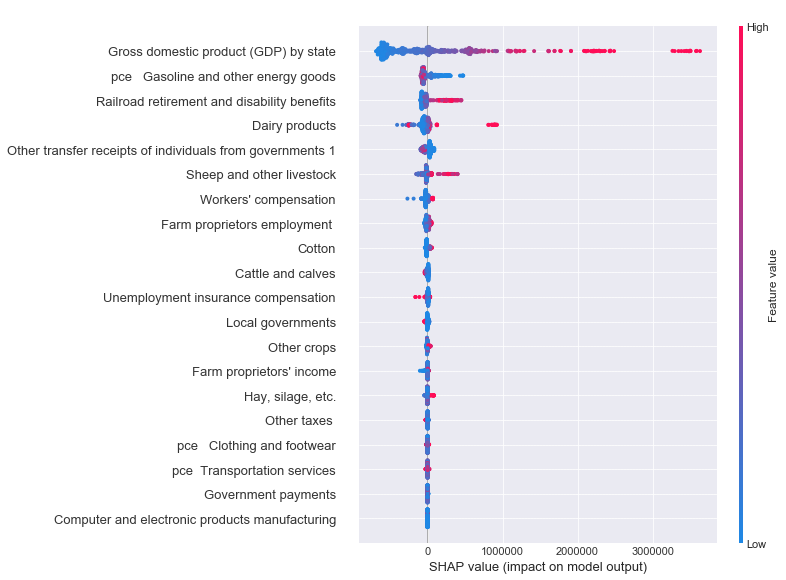

In [527]:
import shap
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

## Working with Open Establish

In [461]:
X = features.drop(["Veterans' life insurance benefits", 'Wage and salary employment', 'Population (persons) ',
                   'Total employment', 'Personal interest income',
                  'Total employment (number of jobs)', 'Monetary interest receipts', 'Real GDP by state'], axis=1)
y = open_establish

In [462]:
X_lag1 = features_lag1.drop(["Veterans' life insurance benefits", 'Wage and salary employment', 'Population (persons) ',
                   'Total employment', 'Personal interest income',
                  'Total employment (number of jobs)', 'Monetary interest receipts', 'Real GDP by state'], axis=1)
y_lag1 = open_establish_lag1

In [463]:
X_lag2 = features_lag2.drop(["Veterans' life insurance benefits", 'Wage and salary employment', 'Population (persons) ',
                   'Total employment', 'Personal interest income',
                  'Total employment (number of jobs)', 'Monetary interest receipts', 'Real GDP by state'], axis=1)
y_lag2 = open_establish_lag2

In [464]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(X))
data_normalized.columns = X.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [465]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized_lag1 = pd.DataFrame(min_max_scaler.fit_transform(X_lag1))
data_normalized_lag1.columns = X_lag1.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [466]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized_lag2 = pd.DataFrame(min_max_scaler.fit_transform(X_lag2))
data_normalized_lag2.columns = X_lag2.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [467]:
# Create correlation matrix
corr_matrix = data_normalized.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [468]:
# Create correlation matrix
corr_matrix = data_normalized_lag1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop_lag1 = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [469]:
# Create correlation matrix
corr_matrix = data_normalized_lag2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop_lag2 = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [470]:
X_new = data_normalized.drop(to_drop, axis=1)
X_new.shape

(1000, 64)

In [471]:
X_new_lag1 = data_normalized_lag1.drop(to_drop_lag1, axis=1)
X_new_lag1.shape

(950, 65)

In [472]:
X_new_lag2 = data_normalized_lag2.drop(to_drop_lag2, axis=1)
X_new_lag2.shape

(900, 65)

In [473]:
# Create and fit selector
selector = SelectKBest(f_regression, k=30)
selector.fit(X_new, y)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [474]:
# Create and fit selector
selector = SelectKBest(f_regression, k=30)
selector.fit(X_new_lag1, y_lag1)
# Get idxs of columns to keep
idxs_selected_lag1 = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [475]:
# Create and fit selector
selector = SelectKBest(f_regression, k=30)
selector.fit(X_new_lag2, y_lag2)
# Get idxs of columns to keep
idxs_selected_lag2 = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [476]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest = X_new.iloc[:,idxs_selected]
X_kbest = sm.add_constant(X_kbest)

In [479]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest_lag1 = X_new_lag1.iloc[:,idxs_selected_lag1]
X_kbest_lag1 = sm.add_constant(X_kbest_lag1)
X_train_lag1 = X_kbest_lag1.iloc[:-100,:]
X_test_lag1 =X_kbest_lag1.iloc[-100:,:]
y_train_lag1 = y_lag1[:-100]
y_test_lag1 = y_lag1[-100:]

In [480]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest_lag2 = X_new_lag2.iloc[:,idxs_selected_lag2]
X_kbest_lag2 = sm.add_constant(X_kbest_lag2)
X_train_lag2 = X_kbest_lag2.iloc[:-100,:]
X_test_lag2 =X_kbest_lag2.iloc[-100:,:]
y_train_lag2 = y_lag2[:-100]
y_test_lag2 = y_lag2[-100:]

In [481]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_lag1, y_train_lag1)
reg.score(X_test_lag1, y_test_lag1)

0.7083172062154659

In [482]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_lag2, y_train_lag2)
reg.score(X_test_lag2, y_test_lag2)

0.7920585134823113

In [483]:
# creating a train/test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=42)

In [338]:
model = sm.OLS(y, X_kbest).fit()
predictions = model.predict(X_kbest) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         open_establish   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     202.4
Date:                Mon, 26 Nov 2018   Prob (F-statistic):               0.00
Time:                        16:10:18   Log-Likelihood:                -13057.
No. Observations:                1000   AIC:                         2.618e+04
Df Residuals:                     969   BIC:                         2.633e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     1.239e+05   3.55e+04      3.489      0.001    5.42e+04    1.94e+05
Gross domestic product (GDP) by state                                                     2.443e+06   1.08e+05     22.624      0.000    2.23e+06    2.65e+06
pce   Clothing and footwear                                                              -2.026e+05   5.03e+04     -4.032      0.000   -3.01e+05   -1.04e+05
pce   Food and beverages purchased for off-premises consumption                          -1.112e+05   4.34e+04     -2.561      0.011   -1.96e+05    -2.6e+04
pce   Gasoline and other energy goods                                                    -3.261e+04   4.45e+04     -0.732      0.464    -1.2e+05    5.48e+04
pce   Motor vehicles and parts                                                           -4.928e+04   4.09e+04     -1.204      0.229    -1.3e+05     3.1e+04
pce  Transportation services                                                              1.111e+05    5.2e+04      2.138      0.033    9103.631    2.13e+05
pce Final consumption expenditures of nonprofit institutions serving households (NPISHs) -2.056e+05   4.31e+04     -4.776      0.000    -2.9e+05   -1.21e+05
Farm proprietors employment                                                                2.76e+04   5.42e+04      0.509      0.611   -7.88e+04    1.34e+05
Farm proprietors' income                                                                 -1.275e+05   7.12e+04     -1.791      0.074   -2.67e+05    1.22e+04
Average nonfarm proprietors' income                                                        2.55e+04   3.78e+04      0.675      0.500   -4.86e+04    9.96e+04
Unemployment insurance compensation                                                      -1.112e+05   7.93e+04     -1.401      0.162   -2.67e+05    4.45e+04
Railroad retirement and disability benefits                                               8.351e+04    3.9e+04      2.139      0.033    6900.058     1.6e+05
Workers' compensation                                                                     1.141e+05   4.88e+04      2.336      0.020    1.82e+04     2.1e+05
Other assistance to veterans 1                                                           -3.365e+04   1.24e+04     -2.710      0.007    -5.8e+04   -9286.132
Other transfer receipts of individuals from governments 1                                -4.692e+05   5.19e+04     -9.033      0.000   -5.71e+05   -3.67e+05
Cattle and calves                                                                        -1.884e+05 

In [359]:
logged_data = np.log(X[['Gross domestic product (GDP) by state', 'Other taxes', 'Local governments', 
                        "Workers' compensation", 'Farm proprietors employment ', 'Per capita rent '
                       ]])
logged_data.columns = ['LOG Gross domestic product (GDP)', 'LOG Taxes', 'LOG Local Government Expenditure',
                      "LOG Average Employee Compensation", 'LOG Farm Employment',
                      'LOG Per Capita Rent']
X_logged = pd.concat([X_kbest, logged_data], axis=1, sort=False)

In [361]:
model = sm.OLS(y, X_logged).fit()
predictions = model.predict(X_logged) # make the predictions by the model

# Print out the coefficients
# Here's the total effect of a 1% parameter change on the target
coefficients = pd.DataFrame(model.params/100, columns=['Open Establish Effect (1% change in feature)'])
log_coefficients = coefficients.iloc[-6:,:]
log_coefficients

,Open Establish Effect (1% change in feature)
LOG Gross domestic product (GDP),725.675657
LOG Taxes,-90.005556
LOG Local Government Expenditure,68.428191
LOG Average Employee Compensation,-175.592643
LOG Farm Employment,-229.146857
LOG Per Capita Rent,-415.078561


In [363]:
log_coefficients.to_csv('open_establish_perc_effect.csv')

In [341]:
from sklearn.tree import DecisionTreeRegressor
treeReg = DecisionTreeRegressor(random_state=0, max_depth=5)
modelRegTree = treeReg.fit(X_train, y_train)
print('Train Score:', treeReg.score(X_train, y_train))
print('Test Score:', treeReg.score(X_test, y_test))

Train Score: 0.9836546947009209
Test Score: 0.930753538848767


In [342]:
from sklearn.tree import DecisionTreeRegressor
treeReg_lag1 = DecisionTreeRegressor(random_state=0, max_depth=5)
modelRegTree_lag1 = treeReg_lag1.fit(X_train_lag1, y_train_lag1)
print('Train Score:', treeReg_lag1.score(X_train_lag1, y_train_lag1))
print('Test Score:', treeReg_lag1.score(X_test_lag1, y_test_lag1))

Train Score: 0.9751631863032743
Test Score: 0.5545768517003726


In [343]:
from sklearn.tree import DecisionTreeRegressor
treeReg_lag2 = DecisionTreeRegressor(random_state=0, max_depth=5)
modelRegTree_lag2 = treeReg_lag2.fit(X_train_lag2, y_train_lag2)
print('Train Score:', treeReg_lag2.score(X_train_lag2, y_train_lag2))
print('Test Score:', treeReg_lag2.score(X_test_lag2, y_test_lag2))

Train Score: 0.9771283823523064
Test Score: 0.960835375783788


In [344]:
features_list_lag1 = X_kbest_lag1.columns
feature_importances = pd.DataFrame({'Feature': features_list_lag1, 'importance': 
                                    treeReg_lag1.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(5)

,Feature,importance
1,Gross domestic product (GDP) by state,0.760435
20,Dairy products,0.141674
2,pce Clothing and footwear,0.040938
4,pce Gasoline and other energy goods,0.022420
7,pce Final consumption expenditures of nonprofi...,0.011205


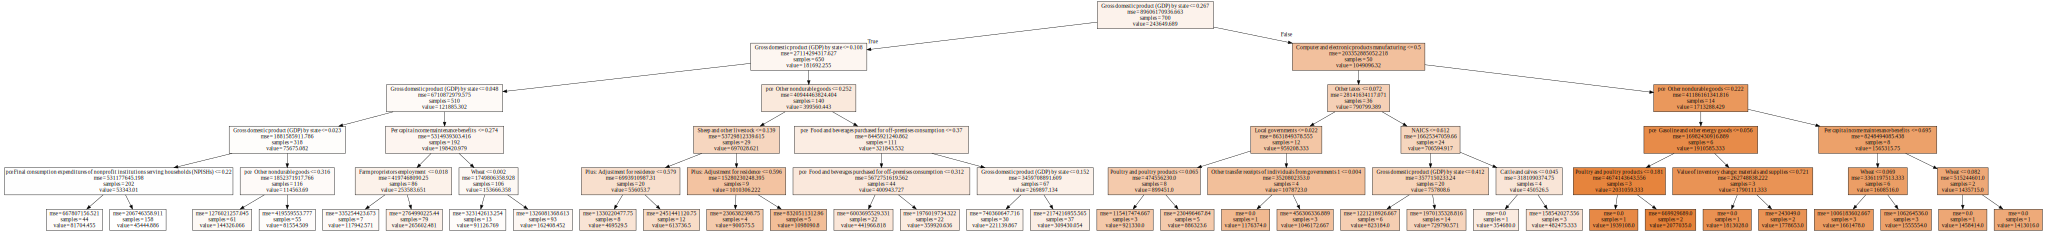

In [539]:
graph = Source(tree.export_graphviz(treeReg, out_file=None
   , feature_names=X_kbest.columns
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [540]:
features_list = X_kbest.columns
feature_importances = pd.DataFrame({'Feature': features_list, 'importance': 
                                    treeReg.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(5)

,Feature,importance
1,Gross domestic product (GDP) by state,0.738622
40,Computer and electronic products manufacturing,0.138799
7,pce Other nondurable goods,0.060828
23,Sheep and other livestock,0.020724
3,pce Food and beverages purchased for off-pre...,0.008578


In [541]:
xgb = XGBRegressor()
regressor = xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.9745685999452529

In [345]:
xgb = XGBRegressor()
regressor = xgb.fit(X_train_lag1, y_train_lag1)
predictions = xgb.predict(X_test_lag1)
xgb.score(X_test_lag1, y_test_lag1)

0.9649455211510637

In [487]:
xgb_lag2 = XGBRegressor()
regressor = xgb_lag2.fit(X_train_lag2, y_train_lag2)
predictions = xgb_lag2.predict(X_test_lag2)
xgb_lag2.score(X_test_lag2, y_test_lag2)

0.9643905661336487

In [488]:
X_lag2_predict = X.iloc[-50:,:]
regressor = xgb_lag2.fit(X_lag2.drop(['Unnamed: 0'], axis=1), y_lag2)
predictions = xgb_lag2.predict(X_lag2_predict)

In [490]:
xgboost_pred['open_establish'] = predictions.astype(int)

In [491]:
xgboost_pred.head()

,state,expand_establish,open_establish
0,Alabama,647126,162752
1,Alaska,160524,32096
2,Arizona,1004534,279865
3,Arkansas,425643,102488
4,California,5822881,1521508


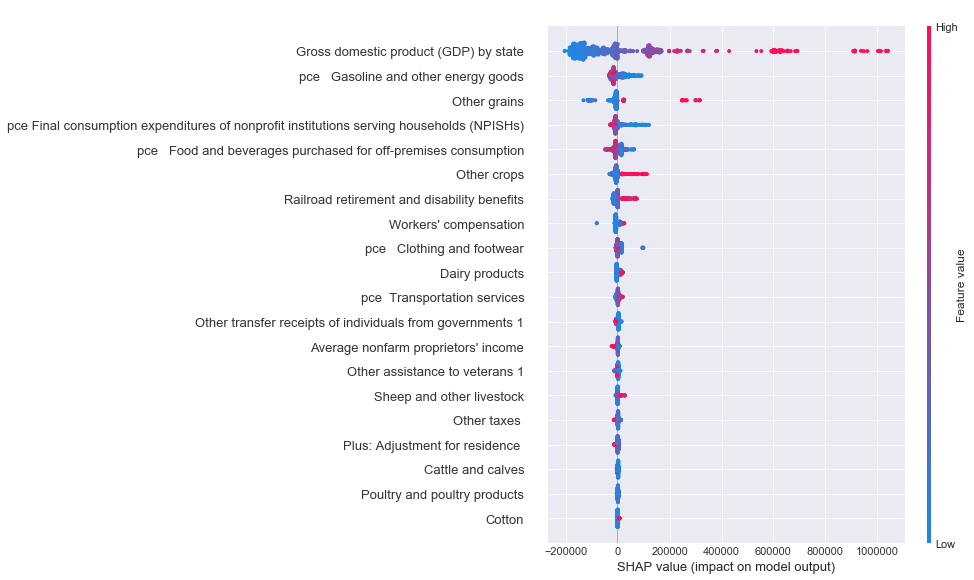

In [347]:
import shap
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_train_lag2)
shap.summary_plot(shap_values, X_train_lag2)

## Working with End Establish

In [492]:
X = features.drop(["Veterans' life insurance benefits", 'Wage and salary employment', 'Population (persons) ',
                   'Total employment', 'Personal interest income',
                  'Total employment (number of jobs)', 'Monetary interest receipts', 'Real GDP by state'], axis=1)
y = end_establish

In [493]:
X_lag1 = features_lag1.drop(["Veterans' life insurance benefits", 'Wage and salary employment', 'Population (persons) ',
                   'Total employment', 'Personal interest income',
                  'Total employment (number of jobs)', 'Monetary interest receipts', 'Real GDP by state'], axis=1)
y_lag1 = end_establish_lag1

In [494]:
X_lag2 = features_lag2.drop(["Veterans' life insurance benefits", 'Wage and salary employment', 'Population (persons) ',
                   'Total employment', 'Personal interest income',
                  'Total employment (number of jobs)', 'Monetary interest receipts', 'Real GDP by state'], axis=1)
y_lag2 = end_establish_lag2

In [495]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(X))
data_normalized.columns = X.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [496]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized_lag1 = pd.DataFrame(min_max_scaler.fit_transform(X_lag1))
data_normalized_lag1.columns = X_lag1.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [497]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized_lag2 = pd.DataFrame(min_max_scaler.fit_transform(X_lag2))
data_normalized_lag2.columns = X_lag2.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [498]:
# Create correlation matrix
corr_matrix = data_normalized.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [499]:
# Create correlation matrix
corr_matrix = data_normalized_lag1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop_lag1 = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [500]:
# Create correlation matrix
corr_matrix = data_normalized_lag2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop_lag2 = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [501]:
X_new = data_normalized.drop(to_drop, axis=1)
X_new.shape

(1000, 64)

In [502]:
X_new_lag1 = data_normalized_lag1.drop(to_drop_lag1, axis=1)
X_new_lag1.shape

(950, 65)

In [503]:
X_new_lag2 = data_normalized_lag2.drop(to_drop_lag2, axis=1)
X_new_lag2.shape

(900, 65)

In [504]:
# Create and fit selector
selector = SelectKBest(f_regression, k=45)
selector.fit(X_new, y)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [505]:
# Create and fit selector
selector = SelectKBest(f_regression, k=45)
selector.fit(X_new_lag1, y_lag1)
# Get idxs of columns to keep
idxs_selected_lag1 = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [506]:
# Create and fit selector
selector = SelectKBest(f_regression, k=45)
selector.fit(X_new_lag2, y_lag2)
# Get idxs of columns to keep
idxs_selected_lag2 = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [507]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest = X_new.iloc[:,idxs_selected]
X_kbest = sm.add_constant(X_kbest)

In [508]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest_lag1 = X_new_lag1.iloc[:,idxs_selected_lag1]
X_kbest_lag1 = sm.add_constant(X_kbest_lag1)

In [509]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest_lag2 = X_new_lag2.iloc[:,idxs_selected_lag2]
X_kbest_lag2 = sm.add_constant(X_kbest_lag2)

In [510]:
# creating a train/test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=42)

In [511]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest_lag1 = X_new_lag1.iloc[:,idxs_selected_lag1]
X_kbest_lag1 = sm.add_constant(X_kbest_lag1)
X_train_lag1 = X_kbest_lag1.iloc[:-50,:]
X_test_lag1 =X_kbest_lag1.iloc[-50:,:]
y_train_lag1 = y_lag1[:-50]
y_test_lag1 = y_lag1[-50:]
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_lag1, y_train_lag1)
reg.score(X_test_lag1, y_test_lag1)

0.6761496834368022

In [512]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest_lag2 = X_new_lag2.iloc[:,idxs_selected_lag2]
X_kbest_lag2 = sm.add_constant(X_kbest_lag2)
X_train_lag2 = X_kbest_lag2.iloc[:-100,:]
X_test_lag2 =X_kbest_lag2.iloc[-100:,:]
y_train_lag2 = y_lag2[:-100]
y_test_lag2 = y_lag2[-100:]
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_lag2, y_train_lag2)
reg.score(X_test_lag2, y_test_lag2)

0.7682306632907845

In [369]:
model = sm.OLS(y_lag2, X_kbest_lag2).fit()
predictions = model.predict(X_kbest_lag2) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          end_establish   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     175.6
Date:                Mon, 26 Nov 2018   Prob (F-statistic):               0.00
Time:                        16:27:10   Log-Likelihood:                -11540.
No. Observations:                 900   AIC:                         2.317e+04
Df Residuals:                     854   BIC:                         2.339e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     -5.98e+04   5.89e+04     -1.016      0.310   -1.75e+05    5.58e+04
Unnamed: 0                                                                                -3.15e+05   4.16e+04     -7.573      0.000   -3.97e+05   -2.33e+05
Gross domestic product (GDP) by state                                                     2.273e+06   1.15e+05     19.787      0.000    2.05e+06     2.5e+06
pce   Clothing and footwear                                                              -1.631e+05   4.76e+04     -3.425      0.001   -2.57e+05   -6.96e+04
pce   Food and beverages purchased for off-premises consumption                           2.059e+05      5e+04      4.117      0.000    1.08e+05    3.04e+05
pce   Furnishings and durable household equipment                                        -1.649e+04   4.51e+04     -0.365      0.715   -1.05e+05    7.21e+04
pce   Gasoline and other energy goods                                                     2.503e+05   5.38e+04      4.652      0.000    1.45e+05    3.56e+05
pce   Motor vehicles and parts                                                           -1.293e+05   4.72e+04     -2.741      0.006   -2.22e+05   -3.67e+04
pce  Transportation services                                                             -2152.5005   5.44e+04     -0.040      0.968   -1.09e+05    1.05e+05
pce Final consumption expenditures of nonprofit institutions serving households (NPISHs) -3.251e+05   4.82e+04     -6.743      0.000    -4.2e+05    -2.3e+05
Farm proprietors employment                                                               7.568e+04   4.96e+04      1.525      0.128   -2.17e+04    1.73e+05
Farm proprietors' income                                                                 -1.426e+05   6.67e+04     -2.137      0.033   -2.74e+05   -1.16e+04
Average nonfarm proprietors' income                                                       1.813e+04   3.45e+04      0.526      0.599   -4.95e+04    8.58e+04
Per capita income maintenance benefits                                                    1.655e+05    4.8e+04      3.451      0.001    7.14e+04     2.6e+05
Per capita interest                                                                        8.11e+04   3.79e+04      2.139      0.033    6682.896    1.56e+05
Other unemployment compensation                                                          -9.211e+04   2.49e+04     -3.699      0.000   -1.41e+05   -4.32e+04
Railroad retirement and disability benefits                                               2.106e+05 

In [397]:
logged_data = np.log(X[['Gross domestic product (GDP) by state', 'Other taxes', 'Local governments', 
                        "Workers' compensation", 'Farm proprietors employment ', 'Per capita rent '
                       ]])
logged_data.columns = ['LOG Gross domestic product (GDP)', 'LOG Taxes', 'LOG Local Government Expenditure',
                      "LOG Average Employee Compensation", 'LOG Farm Employment',
                      'LOG Per Capita Rent']
X_logged = pd.concat([X_kbest, logged_data], axis=1, sort=False)

In [398]:
model = sm.OLS(y, X_logged).fit()
predictions = model.predict(X_logged) # make the predictions by the model

# Print out the coefficients
# Here's the total effect of a 1% parameter change on the target
coefficients = pd.DataFrame(model.params/100, columns=['End Establish Effect (1% change in feature)'])
log_coefficients = coefficients.iloc[-6:,:]
log_coefficients

,End Establish Effect (1% change in feature)
LOG Gross domestic product (GDP),1236.946981
LOG Taxes,-57.734349
LOG Local Government Expenditure,211.542773
LOG Average Employee Compensation,-210.943362
LOG Farm Employment,-71.068236
LOG Per Capita Rent,539.227533


In [399]:
log_coefficients.to_csv('end_establish_perc_effect.csv')

In [370]:
from sklearn.tree import DecisionTreeRegressor
treeReg = DecisionTreeRegressor(random_state=0, max_depth=10)
modelRegTree = treeReg.fit(X_train, y_train)
print('Train Score:', treeReg.score(X_train, y_train))
print('Test Score:', treeReg.score(X_test, y_test))

Train Score: 0.9993722975369208
Test Score: 0.9100825783839976


In [373]:
from sklearn.tree import DecisionTreeRegressor
treeReg_lag1 = DecisionTreeRegressor(random_state=0, max_depth=10)
modelRegTree_lag1 = treeReg_lag1.fit(X_train_lag1, y_train_lag1)
print('Train Score:', treeReg_lag1.score(X_train_lag1, y_train_lag1))
print('Test Score:', treeReg_lag1.score(X_test_lag1, y_test_lag1))


Train Score: 0.9995901572352115
Test Score: 0.9832937819450047


In [372]:
from sklearn.tree import DecisionTreeRegressor
treeReg_lag2 = DecisionTreeRegressor(random_state=0, max_depth=10)
modelRegTree_lag2 = treeReg_lag2.fit(X_train_lag2, y_train_lag2)
print('Train Score:', treeReg_lag2.score(X_train_lag2, y_train_lag2))
print('Test Score:', treeReg_lag2.score(X_test_lag2, y_test_lag2))

Train Score: 0.9995784560218713
Test Score: 0.9534458687500077


In [375]:
features_list = X_kbest_lag1.columns
feature_importances = pd.DataFrame({'Feature': features_list, 'importance': 
                                    treeReg_lag1.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(6)

,Feature,importance
2,Gross domestic product (GDP) by state,0.726566
40,Computer and electronic products manufacturing,0.146603
3,pce Clothing and footwear,0.037994
4,pce Food and beverages purchased for off-pre...,0.016020
1,Unnamed: 0,0.011672
21,Cattle and calves,0.011591


In [552]:
features_list = X_kbest.columns
feature_importances = pd.DataFrame({'Feature': features_list, 'importance': 
                                    treeReg.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(5)

,Feature,importance
1,Gross domestic product (GDP) by state,0.714396
27,"Hay, silage, etc.",0.143980
6,pce Other nondurable goods,0.048775
22,Sheep and other livestock,0.024646
34,Other taxes,0.014765


In [553]:
xgb = XGBRegressor()
regressor = xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.9747357866280599

In [513]:
xgb_lag2 = XGBRegressor()
regressor = xgb_lag2.fit(X_train_lag2, y_train_lag2)
predictions = xgb_lag2.predict(X_test_lag2)
xgb_lag2.score(X_test_lag2, y_test_lag2)

0.9703602670659672

In [514]:
X_lag2_predict = X.iloc[-50:,:]
regressor = xgb_lag2.fit(X_lag2.drop(['Unnamed: 0'], axis=1), y_lag2)
predictions = xgb_lag2.predict(X_lag2_predict)

In [516]:
xgboost_pred['end_establish'] = predictions.astype(int)

In [517]:
xgboost_pred.head()

,state,expand_establish,open_establish,end_establish
0,Alabama,647126,162752,145838
1,Alaska,160524,32096,24268
2,Arizona,1004534,279865,241676
3,Arkansas,425643,102488,95910
4,California,5822881,1521508,1444675


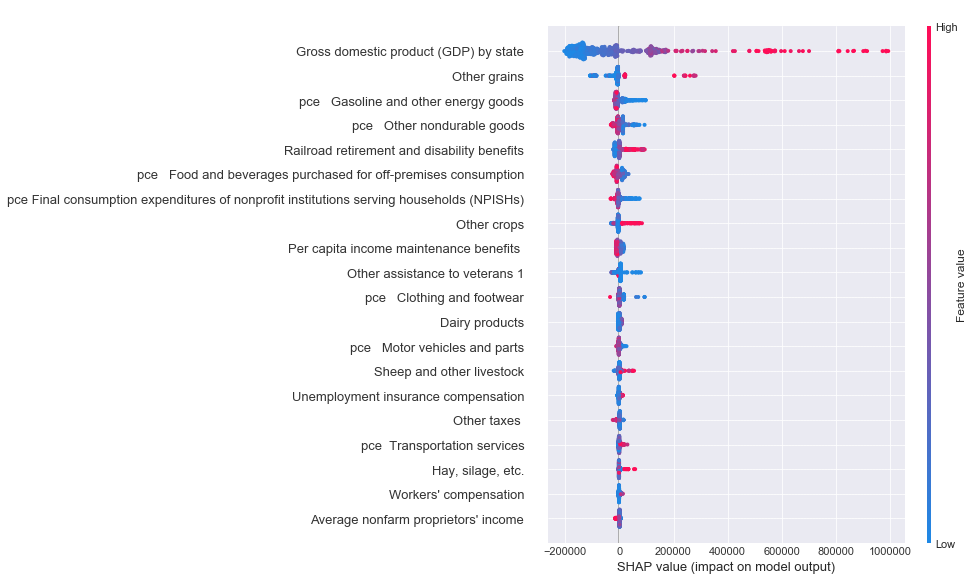

In [554]:
import shap
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

## Working with Net Change

In [226]:
X = features
y = net_change

In [227]:
X_lag1 = features_lag1
y_lag1 = net_change_lag1

In [228]:
X_lag2 = features_lag2
y_lag2 = net_change_lag2

In [229]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(X))
data_normalized.columns = X.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [230]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized_lag1 = pd.DataFrame(min_max_scaler.fit_transform(X_lag1))
data_normalized_lag1.columns = X_lag1.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [231]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized_lag2 = pd.DataFrame(min_max_scaler.fit_transform(X_lag2))
data_normalized_lag2.columns = X_lag2.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [232]:
# Create correlation matrix
corr_matrix = data_normalized.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [233]:
# Create correlation matrix
corr_matrix = data_normalized_lag2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop_lag2 = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [234]:
# Create correlation matrix
corr_matrix = data_normalized_lag1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop_lag1 = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [235]:
X_new = data_normalized.drop(to_drop, axis=1)
X_new.shape

(1000, 64)

In [236]:
X_new_lag1 = data_normalized_lag1.drop(to_drop_lag1, axis=1)
X_new_lag1.shape

(950, 65)

In [237]:
X_new_lag2 = data_normalized_lag2.drop(to_drop_lag2, axis=1)
X_new_lag2.shape

(900, 65)

In [247]:
# Create and fit selector
selector = SelectKBest(f_regression, k=40)
selector.fit(X_new, y)
# Get idxs of columns to keep
idxs_selected = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [264]:
# Create and fit selector
selector = SelectKBest(f_regression, k=10)
selector.fit(X_new_lag1, y_lag1)
# Get idxs of columns to keep
idxs_selected_lag1 = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [249]:
# Create and fit selector
selector = SelectKBest(f_regression, k=40)
selector.fit(X_new_lag2, y_lag2)
# Get idxs of columns to keep
idxs_selected_lag2 = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [250]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest = X_new.iloc[:,idxs_selected]
X_kbest = sm.add_constant(X_kbest)

In [265]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest_lag1 = X_new_lag1.iloc[:,idxs_selected_lag1]
X_kbest_lag1 = sm.add_constant(X_kbest_lag1)

In [252]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest_lag2 = X_new_lag2.iloc[:,idxs_selected_lag2]
X_kbest_lag2 = sm.add_constant(X_kbest_lag2)

In [253]:
# creating a train/test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.3, random_state=42)

In [267]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest_lag1 = X_new_lag1.iloc[:,idxs_selected_lag1]
X_kbest_lag1 = sm.add_constant(X_kbest_lag1)
X_train_lag1 = X_kbest_lag1.iloc[:-50,:]
X_test_lag1 =X_kbest_lag1.iloc[-50:,:]
y_train_lag1 = y_lag1[:-50]
y_test_lag1 = y_lag1[-50:]
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_lag1, y_train_lag1)
reg.score(X_test_lag1, y_test_lag1)

0.332542890427748

In [255]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest_lag2 = X_new_lag2.iloc[:,idxs_selected_lag2]
X_kbest_lag2 = sm.add_constant(X_kbest_lag2)
X_train_lag2 = X_kbest_lag2.iloc[:-50,:]
X_test_lag2 =X_kbest_lag2.iloc[-50:,:]
y_train_lag2 = y_lag2[:-50]
y_test_lag2 = y_lag2[-50:]
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_lag2, y_train_lag2)
reg.score(X_test_lag2, y_test_lag2)

0.5334685413279293

In [384]:
model = sm.OLS(y, X_kbest).fit()
predictions = model.predict(X_kbest) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             net_change   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     11.97
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           1.54e-65
Time:                        17:38:55   Log-Likelihood:                -13237.
No. Observations:                1000   AIC:                         2.657e+04
Df Residuals:                     954   BIC:                         2.679e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                    -1.744e+04   1.04e+05     -0.167      0.867   -2.22e+05    1.87e+05
Gross domestic product (GDP) by state                                                    -2.957e+05    1.4e+05     -2.109      0.035   -5.71e+05   -2.05e+04
pce   Clothing and footwear                                                               3.238e+05   9.03e+04      3.586      0.000    1.47e+05    5.01e+05
pce   Food and beverages purchased for off-premises consumption                           1.178e+05    6.4e+04      1.841      0.066   -7754.207    2.43e+05
pce   Furnishings and durable household equipment                                        -5.382e+04    6.4e+04     -0.841      0.400   -1.79e+05    7.17e+04
pce   Gasoline and other energy goods                                                    -1.912e+05   6.55e+04     -2.918      0.004    -3.2e+05   -6.26e+04
pce   Motor vehicles and parts                                                             5.68e+04   6.39e+04      0.889      0.374   -6.87e+04    1.82e+05
pce   Other durable goods                                                                -1.868e+05   7.51e+04     -2.486      0.013   -3.34e+05   -3.94e+04
pce  Transportation services                                                              1.762e+05   8.27e+04      2.131      0.033    1.39e+04    3.38e+05
pce Final consumption expenditures of nonprofit institutions serving households (NPISHs) -2.706e+05   6.56e+04     -4.128      0.000   -3.99e+05   -1.42e+05
Farm proprietors employment                                                               6.347e+04   7.09e+04      0.895      0.371   -7.56e+04    2.03e+05
Farm proprietors' income                                                                  8.621e+05   9.54e+04      9.033      0.000    6.75e+05    1.05e+06
Average nonfarm proprietors' income                                                       -8.39e+04   4.84e+04     -1.734      0.083   -1.79e+05     1.1e+04
Per capita dividends                                                                      1.113e+05   6.15e+04      1.811      0.070   -9309.632    2.32e+05
Per capita income maintenance benefits                                                    1.374e+05   4.23e+04      3.250      0.001    5.44e+04     2.2e+05
Per capita unemployment insurance compensation                                           -2.188e+05   4.13e+04     -5.293      0.000      -3e+05   -1.38e+05
Other unemployment compensation                                                           -5.07e+04 

In [385]:
logged_data = np.log(X[['Gross domestic product (GDP) by state', 'Other taxes', 'Local governments', 
                        "Workers' compensation", 'Farm proprietors employment ', 'Per capita rent '
                       ]])
logged_data.columns = ['LOG Gross domestic product (GDP)', 'LOG Taxes', 'LOG Local Government Expenditure',
                      "LOG Average Employee Compensation", 'LOG Farm Employment',
                      'LOG Per Capita Rent']
X_logged = pd.concat([X_kbest, logged_data], axis=1, sort=False)

In [388]:
model = sm.OLS(y, X_logged).fit()
predictions = model.predict(X_logged) # make the predictions by the model

# Print out the coefficients
# Here's the total effect of a 1% parameter change on the target
coefficients = pd.DataFrame(model.params/100, columns=['Net Change Effect (1% change in feature)'])
log_coefficients = coefficients.iloc[-6:,:]
log_coefficients

,Net Change Effect (1% change in feature)
LOG Gross domestic product (GDP),-402.207288
LOG Taxes,-101.425834
LOG Local Government Expenditure,-96.801931
LOG Average Employee Compensation,20.446656
LOG Farm Employment,-121.890155
LOG Per Capita Rent,385.135954


In [563]:
from sklearn.tree import DecisionTreeRegressor
treeReg = DecisionTreeRegressor(random_state=0, max_depth=10)
modelRegTree = treeReg.fit(X_train, y_train)
print('Train Score:', treeReg.score(X_train, y_train))
print('Test Score:', treeReg.score(X_test, y_test))

Train Score: 0.9339360115809294
Test Score: -0.22258450683179953


In [565]:
features_list = X_kbest.columns
feature_importances = pd.DataFrame({'Feature': features_list, 'importance': 
                                    treeReg.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(5)

,Feature,importance
1,Gross domestic product (GDP) by state,0.376402
11,Farm proprietors' income,0.143446
19,Other transfer receipts of individuals from go...,0.082012
15,Per capita unemployment insurance compensation,0.050082
24,Cotton,0.048453


In [566]:
xgb = XGBRegressor()
regressor = xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
xgb.score(X_test, y_test)

0.0847857842761417

## Working with contract establish

In [536]:
X = features.drop(['Population (persons) ', 'Wage and salary employment',
                            'Total employment', 'Total employment (number of jobs)',
                            'Real GDP by state'], axis=1)
y = contract_establish

In [518]:
X_lag1 = features_lag1.drop(['Population (persons) ', 'Wage and salary employment',
                            'Total employment', 'Total employment (number of jobs)',
                            'Real GDP by state'], axis=1)
y_lag1 = contract_establish_lag1

In [519]:
X_lag2 = features_lag2.drop(['Population (persons) ', 'Wage and salary employment',
                            'Total employment', 'Total employment (number of jobs)',
                            'Real GDP by state'], axis=1)
y_lag2 = contract_establish_lag2

In [520]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized_lag1 = pd.DataFrame(min_max_scaler.fit_transform(X_lag1))
data_normalized_lag1.columns = X_lag1.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [537]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized = pd.DataFrame(min_max_scaler.fit_transform(X))
data_normalized.columns = X.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [521]:
# normalize the dataset
min_max_scaler = preprocessing.MinMaxScaler()
data_normalized_lag2 = pd.DataFrame(min_max_scaler.fit_transform(X_lag2))
data_normalized_lag2.columns = X_lag2.columns

//anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [522]:
# Create correlation matrix
corr_matrix = data_normalized_lag1.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop_lag1 = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [523]:
# Create correlation matrix
corr_matrix = data_normalized_lag2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop_lag2 = [column for column in upper.columns if any(upper[column] > 0.8)] # might need to play with this threshold

In [524]:
X_new_lag1 = data_normalized_lag1.drop(to_drop_lag1, axis=1)
X_new_lag1.shape

(950, 65)

In [525]:
X_new_lag2 = data_normalized_lag2.drop(to_drop_lag2, axis=1)
X_new_lag2.shape

(900, 65)

In [526]:
# Create and fit selector
selector = SelectKBest(f_regression, k=20)
selector.fit(X_new_lag1, y_lag1)
# Get idxs of columns to keep
idxs_selected_lag1 = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [527]:
# Create and fit selector
selector = SelectKBest(f_regression, k=20)
selector.fit(X_new_lag2, y_lag2)
# Get idxs of columns to keep
idxs_selected_lag2 = selector.get_support(indices=True)
kbest_scores = pd.DataFrame(selector.scores_)
kbest_scores.columns = ['kbest_score']

In [528]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest_lag1 = X_new_lag1.iloc[:,idxs_selected_lag1]
X_kbest_lag1 = sm.add_constant(X_kbest_lag1)

In [529]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest_lag2 = X_new_lag2.iloc[:,idxs_selected_lag2]
X_kbest_lag2 = sm.add_constant(X_kbest_lag2)

In [530]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest_lag1 = X_new_lag1.iloc[:,idxs_selected_lag1]
X_kbest_lag1 = sm.add_constant(X_kbest_lag1)
X_train_lag1 = X_kbest_lag1.iloc[:-100,:]
X_test_lag1 =X_kbest_lag1.iloc[-100:,:]
y_train_lag1 = y_lag1[:-100]
y_test_lag1 = y_lag1[-100:]
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_lag1, y_train_lag1)
reg.score(X_test_lag1, y_test_lag1)

0.6919363271354797

In [531]:
# Create new dataframe with only desired columns, or overwrite existing
X_kbest_lag2 = X_new_lag2.iloc[:,idxs_selected_lag2]
X_kbest_lag2 = sm.add_constant(X_kbest_lag2)
X_train_lag2 = X_kbest_lag2.iloc[:-50,:]
X_test_lag2 =X_kbest_lag2.iloc[-50:,:]
y_train_lag2 = y_lag2[:-50]
y_test_lag2 = y_lag2[-50:]
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_lag2, y_train_lag2)
reg.score(X_test_lag2, y_test_lag2)

0.8983950839624353

In [532]:
from sklearn.tree import DecisionTreeRegressor
treeReg_lag1 = DecisionTreeRegressor(random_state=0, max_depth=10)
modelRegTree_lag1 = treeReg_lag1.fit(X_train_lag1, y_train_lag1)
print('Train Score:', treeReg_lag1.score(X_train_lag1, y_train_lag1))
print('Test Score:', treeReg_lag1.score(X_test_lag1, y_test_lag1))
features_list = X_kbest_lag1.columns
feature_importances = pd.DataFrame({'Feature': features_list, 'importance': 
                                    treeReg_lag1.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(6)

Train Score: 0.9994629950492737
Test Score: 0.9277944123113017


,Feature,importance
1,Gross domestic product (GDP) by state,0.776021
20,Computer and electronic products manufacturing,0.123530
8,Railroad retirement and disability benefits,0.054264
11,Sheep and other livestock,0.008201
3,pce Gasoline and other energy goods,0.007938
9,Workers' compensation,0.007398


In [391]:
from sklearn.tree import DecisionTreeRegressor
treeReg_lag2 = DecisionTreeRegressor(random_state=0, max_depth=10)
modelRegTree_lag2 = treeReg_lag2.fit(X_train_lag2, y_train_lag2)
print('Train Score:', treeReg_lag1.score(X_train_lag2, y_train_lag2))
print('Test Score:', treeReg_lag2.score(X_test_lag2, y_test_lag2))
features_list = X_kbest_lag2.columns
feature_importances = pd.DataFrame({'Feature': features_list, 'importance': 
                                    treeReg_lag1.feature_importances_}).sort_values('importance', ascending=False)
feature_importances.head(6)

Train Score: 0.909801578182934
Test Score: 0.9427341746570762


,Feature,importance
1,Gross domestic product (GDP) by state,0.776021
20,Computer and electronic products manufacturing,0.123530
8,Workers' compensation,0.054264
11,Cattle and calves,0.008201
3,pce Gasoline and other energy goods,0.007938
9,Military medical insurance benefits,0.007398


In [533]:
xgb_lag2 = XGBRegressor()
regressor = xgb_lag2.fit(X_train_lag2, y_train_lag2)
predictions = xgb_lag2.predict(X_test_lag2)
xgb_lag2.score(X_test_lag2, y_test_lag2)

0.9524262796455787

In [538]:
X_lag2_predict = X.iloc[-50:,:]
regressor = xgb_lag2.fit(X_lag2.drop(['Unnamed: 0'], axis=1), y_lag2)
predictions = xgb_lag2.predict(X_lag2_predict)

In [539]:
xgboost_pred['contract_establish'] = predictions.astype(int)

In [540]:
xgboost_pred

,state,expand_establish,open_establish,end_establish,contract_establish
0,Alabama,647126,162752,145838,645868
1,Alaska,160524,32096,24268,160498
2,Arizona,1004534,279865,241676,903815
3,Arkansas,425643,102488,95910,417096
4,California,5822881,1521508,1444675,5677865
5,Colorado,894095,238035,213842,852826
6,Connecticut,540315,141832,117708,643841
7,Delaware,157243,34394,28480,142814
8,Florida,3077654,902066,834767,2927763
9,Georgia,1434853,345410,317784,1249261
